## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
for bh in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
                epochs=EPOCHS, 
                batch_size=bh, 
                validation_data=(x_test, y_test), 
                shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-batchsize-%s" % str(bh)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 406s 8ms/step - loss: 2.2535 - accuracy: 0.1579 - val_loss: 5.5263 - val_accuracy: 0.1977
Epoch 46/50
50000/50000 [==============================] - 404s 8ms/step - loss: 2.2538 - accuracy: 0.1572 - val_loss: 8.2004 - val_accuracy: 0.1945
Epoch 47/50
50000/50000 [==============================] - 403s 8ms/step - loss: 2.2492 - accuracy: 0.1612 - val_loss: 7.9662 - val_accuracy: 0.1871
Epoch 48/50
50000/50000 [==============================] - 406s 8ms/step - loss: 2.2561 - accuracy: 0.1562 - val_loss: 5.3711 - val_accuracy: 0.1778
Epoch 49/50
50000/50000 [==============================] - 405s 8ms/step - loss: 2.2568 - accuracy: 0.1564 - val_loss: 5.6866 - val_accuracy: 0.1721
Epoch 50/50
50000/50000 [==============================] - 405s 8ms/step - loss: 2.2538 - accuracy: 0.1554 - val_loss: 9.4646 - val_accuracy: 0.1922
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output

50000/50000 [==============================] - 53s 1ms/step - loss: 1.1597 - accuracy: 0.5908 - val_loss: 1.3296 - val_accuracy: 0.5386
Epoch 41/50
50000/50000 [==============================] - 53s 1ms/step - loss: 1.1466 - accuracy: 0.5929 - val_loss: 1.3378 - val_accuracy: 0.5292
Epoch 42/50
50000/50000 [==============================] - 53s 1ms/step - loss: 1.1432 - accuracy: 0.5936 - val_loss: 1.3276 - val_accuracy: 0.5319
Epoch 43/50
50000/50000 [==============================] - 53s 1ms/step - loss: 1.1318 - accuracy: 0.5994 - val_loss: 1.3300 - val_accuracy: 0.5319
Epoch 44/50
50000/50000 [==============================] - 53s 1ms/step - loss: 1.1360 - accuracy: 0.5975 - val_loss: 1.3378 - val_accuracy: 0.5302
Epoch 45/50
50000/50000 [==============================] - 53s 1ms/step - loss: 1.1303 - accuracy: 0.6010 - val_loss: 1.3826 - val_accuracy: 0.5145
Epoch 46/50
50000/50000 [==============================] - 53s 1ms/step - loss: 1.1208 - accuracy: 0.6024 - val_loss: 1.3541

50000/50000 [==============================] - 28s 555us/step - loss: 0.9005 - accuracy: 0.6816 - val_loss: 1.4777 - val_accuracy: 0.5111
Epoch 36/50
50000/50000 [==============================] - 28s 554us/step - loss: 0.8862 - accuracy: 0.6846 - val_loss: 1.4982 - val_accuracy: 0.5034
Epoch 37/50
50000/50000 [==============================] - 28s 552us/step - loss: 0.8914 - accuracy: 0.6805 - val_loss: 1.5486 - val_accuracy: 0.5001
Epoch 38/50
50000/50000 [==============================] - 28s 557us/step - loss: 0.8840 - accuracy: 0.6863 - val_loss: 1.4687 - val_accuracy: 0.5169
Epoch 39/50
50000/50000 [==============================] - 28s 554us/step - loss: 0.8740 - accuracy: 0.6875 - val_loss: 1.5758 - val_accuracy: 0.4838
Epoch 40/50
50000/50000 [==============================] - 28s 554us/step - loss: 0.8604 - accuracy: 0.6938 - val_loss: 1.4920 - val_accuracy: 0.5245
Epoch 41/50
50000/50000 [==============================] - 28s 561us/step - loss: 0.8523 - accuracy: 0.6950 - va

Epoch 30/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.5473 - accuracy: 0.8099 - val_loss: 2.0735 - val_accuracy: 0.4377
Epoch 31/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.5316 - accuracy: 0.8132 - val_loss: 2.0656 - val_accuracy: 0.4493
Epoch 32/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.5116 - accuracy: 0.8195 - val_loss: 1.9728 - val_accuracy: 0.4735
Epoch 33/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.4882 - accuracy: 0.8306 - val_loss: 1.9730 - val_accuracy: 0.4618
Epoch 34/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.4689 - accuracy: 0.8374 - val_loss: 2.0608 - val_accuracy: 0.4661
Epoch 35/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.4498 - accuracy: 0.8431 - val_loss: 2.1947 - val_accuracy: 0.4505
Epoch 36/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.4377 - accuracy:

50000/50000 [==============================] - 6s 125us/step - loss: 0.6093 - accuracy: 0.7966 - val_loss: 1.8819 - val_accuracy: 0.4496
Epoch 26/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.5847 - accuracy: 0.8064 - val_loss: 1.8349 - val_accuracy: 0.4719
Epoch 27/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.5520 - accuracy: 0.8180 - val_loss: 1.8633 - val_accuracy: 0.4685
Epoch 28/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.5278 - accuracy: 0.8258 - val_loss: 1.8483 - val_accuracy: 0.4675
Epoch 29/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.5057 - accuracy: 0.8363 - val_loss: 1.9090 - val_accuracy: 0.4661
Epoch 30/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.4829 - accuracy: 0.8430 - val_loss: 2.1811 - val_accuracy: 0.4329
Epoch 31/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.4646 - accuracy: 0.8502 - val_loss:

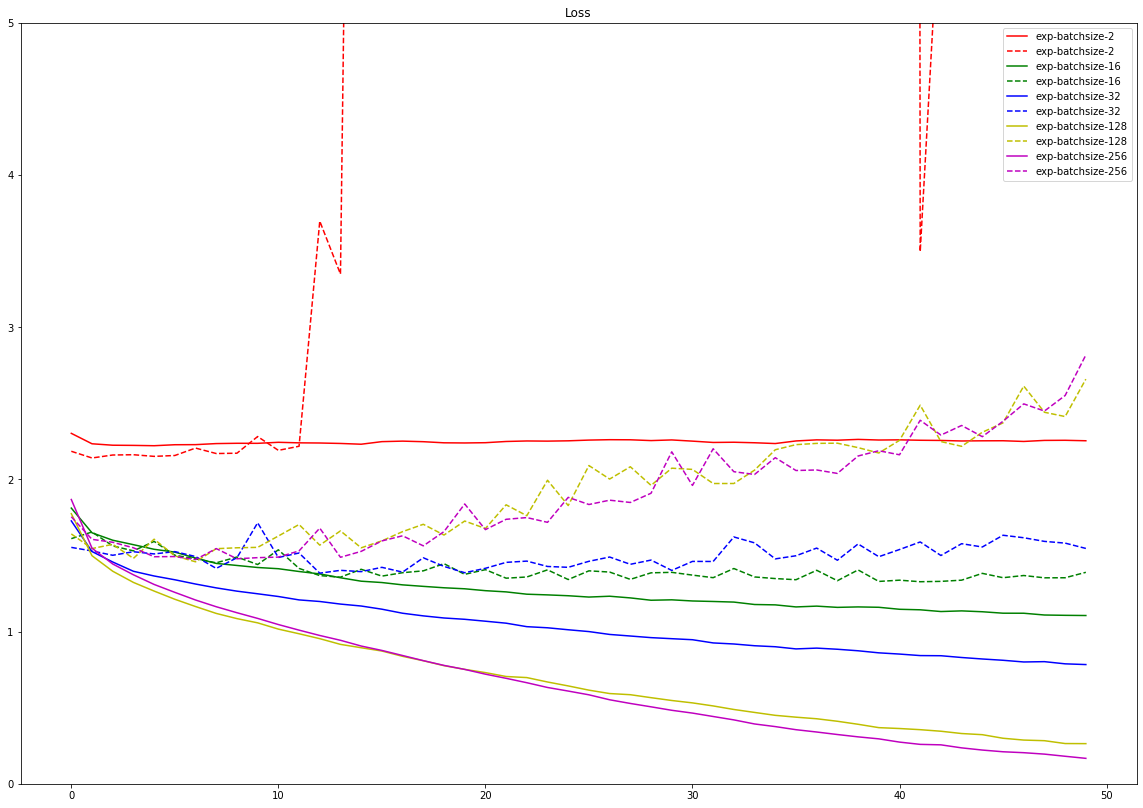

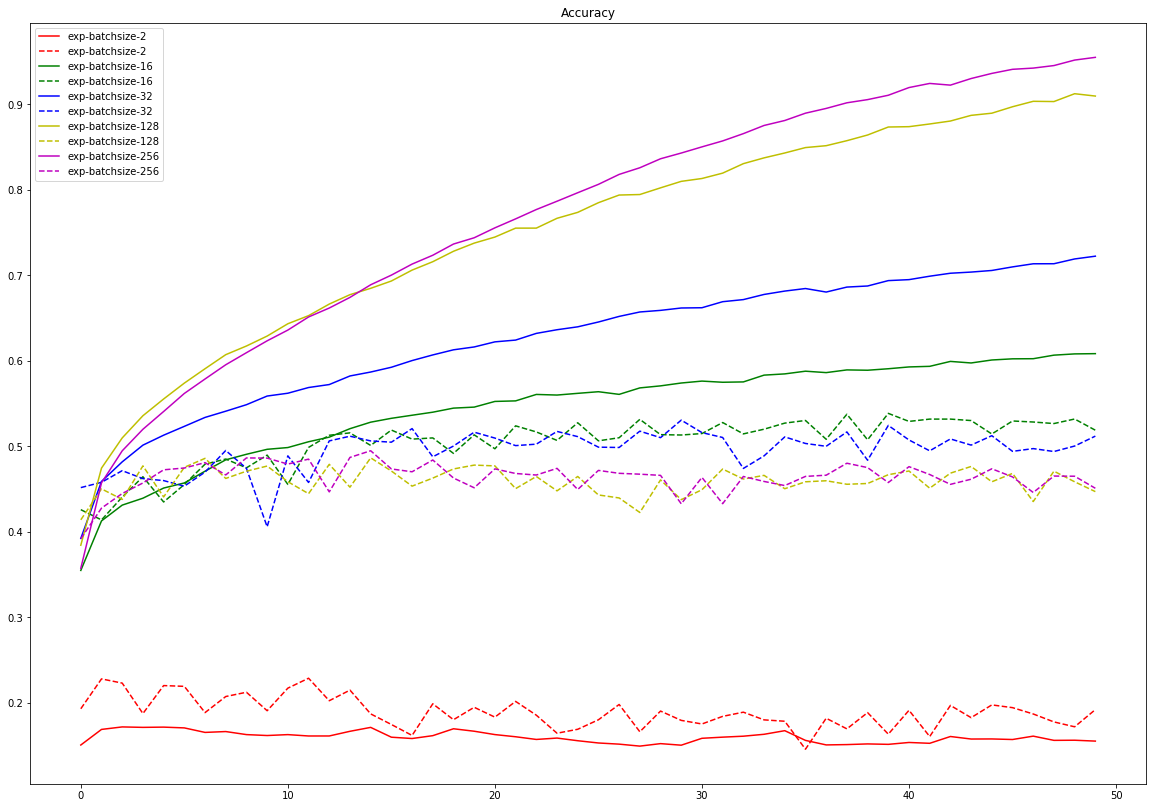

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(20,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(20,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
def build_mlp_normal(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
def build_mlp_bhinput(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
def build_mlp_bhoutput(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 64
MOMENTUM = 0.95

In [11]:
result_new={}
for i in range(3):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    if i==0:
        model = build_mlp_normal(input_shape=x_train.shape[1:])
    elif i==1:
        model = build_mlp_bhinput(input_shape=x_train.shape[1:])
    else:
        model = build_mlp_bhoutput(input_shape=x_train.shape[1:])
    
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
                epochs=EPOCHS, 
                batch_size=bh, 
                validation_data=(x_test, y_test), 
                shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    if i==0:
        model_name="normalmodel"
    elif i==1:
        model_name="inputbatchmodel"
    else:
        model_name="outputbatchmodel"
    exp_name_tag = "exp-model-%s" % model_name
    result_new[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 118u

Epoch 49/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.8799 - accuracy: 0.6908 - val_loss: 1.4007 - val_accuracy: 0.5307
Epoch 50/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.8670 - accuracy: 0.6971 - val_loss: 1.5198 - val_accuracy: 0.4990
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)    

Epoch 46/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.3767 - accuracy: 0.8793 - val_loss: 2.0959 - val_accuracy: 0.4724
Epoch 47/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.3656 - accuracy: 0.8835 - val_loss: 2.3031 - val_accuracy: 0.4660
Epoch 48/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.3541 - accuracy: 0.8882 - val_loss: 2.1381 - val_accuracy: 0.4721
Epoch 49/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.3350 - accuracy: 0.8935 - val_loss: 2.1204 - val_accuracy: 0.4882
Epoch 50/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.3177 - accuracy: 0.8998 - val_loss: 2.2398 - val_accuracy: 0.4741
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
________________________________________

Epoch 43/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.6272 - accuracy: 0.7810 - val_loss: 1.7531 - val_accuracy: 0.4996
Epoch 44/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.6140 - accuracy: 0.7844 - val_loss: 1.6833 - val_accuracy: 0.5145
Epoch 45/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.5988 - accuracy: 0.7891 - val_loss: 1.8438 - val_accuracy: 0.4871
Epoch 46/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.5868 - accuracy: 0.7955 - val_loss: 1.8330 - val_accuracy: 0.4970
Epoch 47/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.5732 - accuracy: 0.7990 - val_loss: 1.7613 - val_accuracy: 0.5086
Epoch 48/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.5594 - accuracy: 0.8045 - val_loss: 1.7738 - val_accuracy: 0.5024
Epoch 49/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.5433 - accuracy: 0.8104

KeyError: 'exp-batchsize-64'

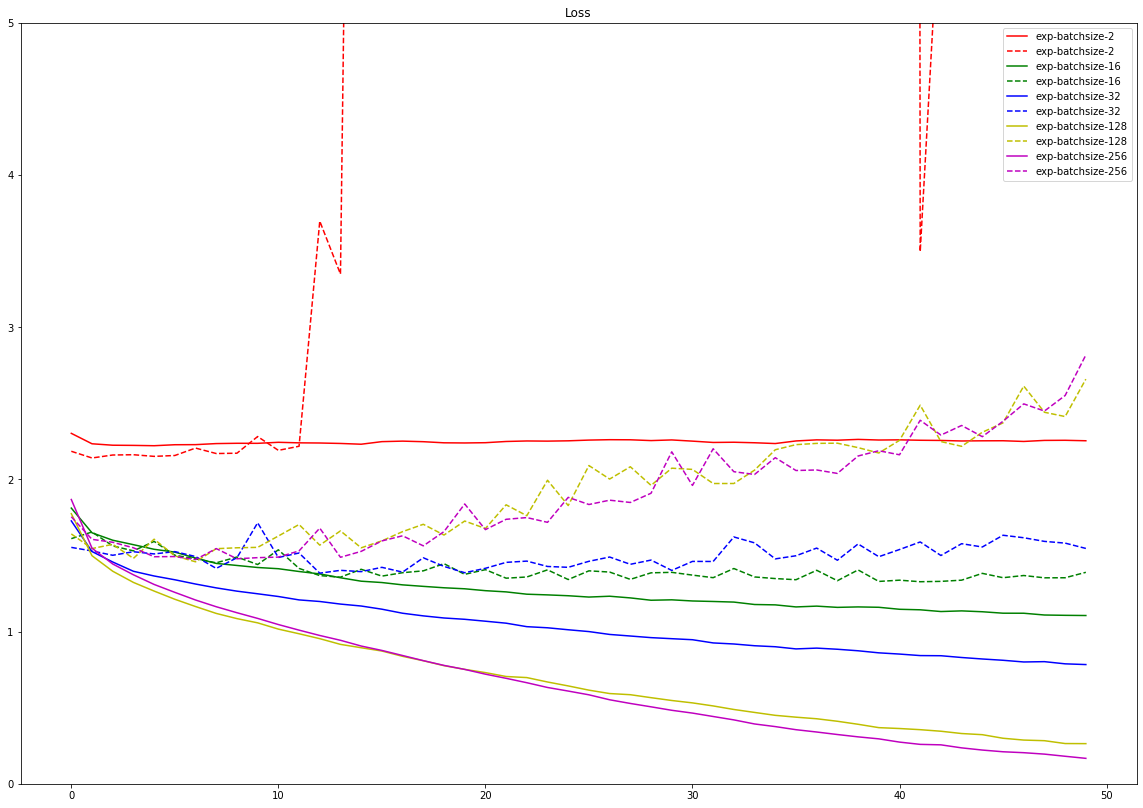

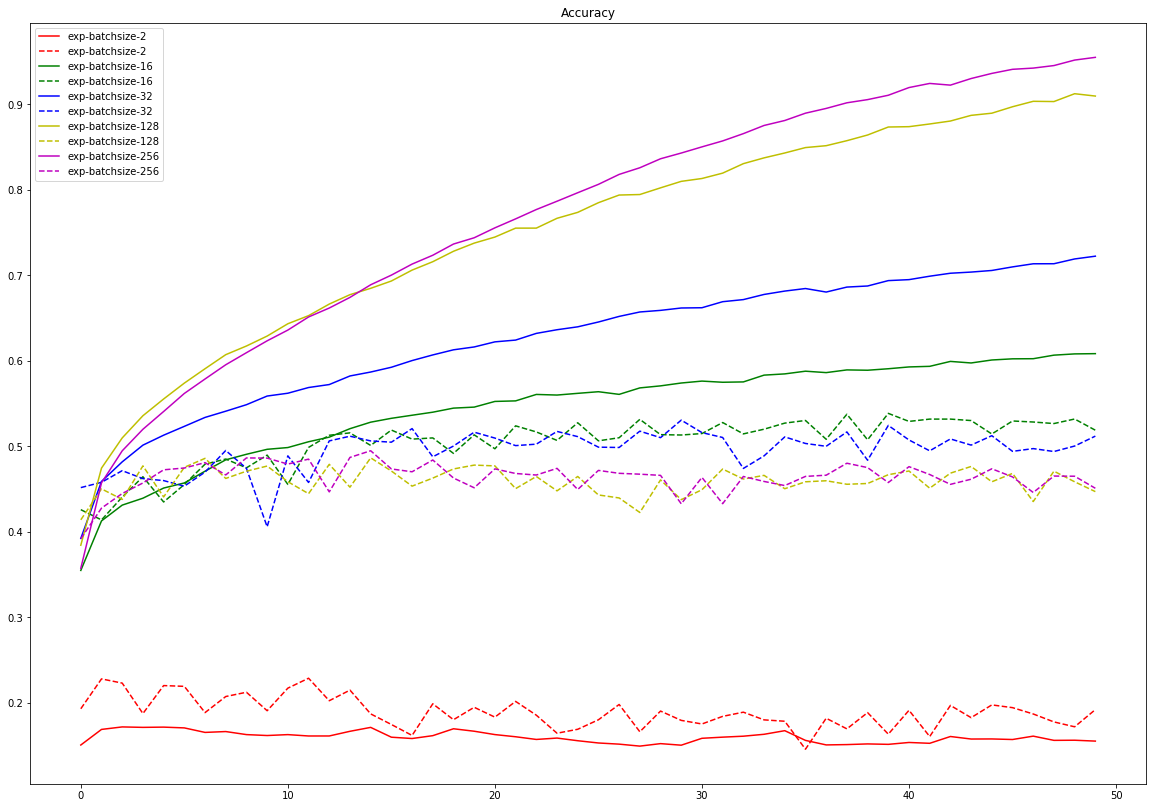

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(20,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(20,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

由此可知，batch取2的時候會造成loss以及accuracy都不好收斂。